## Question 1

In [14]:
from selenium import webdriver #importing the required libraries
import time
#Opening the web driver by locating the executable path of the webdriver into var driver
driver=webdriver.Chrome(executable_path='C:/Users/deepa/Desktop/chromedriver_win32/chromedriver.exe') 
driver.get('https://www.instagram.com/') #Opening the required website online web driver session
time.sleep(5) # Waiting for the site to open
username=driver.find_element_by_name('username') # Identifying the text box to enter username
username.send_keys('Sample-Username') # Tying username into text box
password=driver.find_element_by_name('password') # Identifying the text box to enter password
password.send_keys('Sample-Password') # Typing password into text box
time.sleep(3) # Waiting so that required text boxes are filled
login=driver.find_element_by_xpath('//div[contains(@class,"Igw0E")]/button') # Identifying the login button
login.submit() # Submitting the required information to open the account
time.sleep(5) # Waiting for the account to open
# Dealing with the message to save or do not save the password
request=driver.find_element_by_xpath('//div[@class="cmbtv"]/button') 
request.click() # Clicking on Not now
time.sleep(3) # Waiting for the operation 
# Dealing with the notification message to notify for the messages or not
notifications=driver.find_element_by_xpath('//div[@class="mt3GC"]//button[2]')
notifications.click() #Clicking on Not now

In [15]:
search=driver.find_element_by_xpath('//div[contains(@class,"LWmhU")]/input') #Locating the search bar
search.send_keys('food') # Tying with food in the search bar

### Question 1.1

In [16]:
profile=[] #Initialising a list to store the top 10 handles after searching food in search bar
i=1 # Making i=1 so that as soon as it becomes 11 we break it 
while True:
    if i==11: #If i becomes 11 then we have to break the infinite loop as we have stored the first 10 handles
        break
    #Locating each page so that we can take its  username so that we can open their web session by adding it to base url   
    page=driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[3]/div/div[2]/div/div['+str(i)+']')
    if page.text.split('\n')[0][0]!='#': # Avoiding the usernames starting with '#'
        profile.append(page.text.split('\n')[0]) # Appending the first 10 valid ig handles
        i=i+1 #incrementing i

In [138]:
profile # Printing the first valid 10 ig handles after searching food 

['yourfoodlab',
 'foodie_incarnate',
 'foodrush.recipe',
 'streetfoodrecipe',
 'street_food_chandigarh',
 'foodvibesonly__',
 'food',
 'food__india___',
 'fooodsnifffer',
 'delhi_streets_food']

In [12]:
base_url='https://www.instagram.com' # Taking base url
followers=[] # Initialising list to append followers of the ig handle
usernames=[] # Initialising list to append username of the ig handle
# Running a loop for the 10 ig handles by opening web driver session of each ig handle by appening the handle's username to the base url
# After opening the handle , storing their followers 
for i in range(10): 
    complete_url=base_url+'/'+profile[i]+'/' # URL to be opened
    driver.get(complete_url) # Making driver web session of each handle
    time.sleep(3) # Waiting for each handle to open
    number=driver.find_elements_by_class_name('g47SY') # Locating the number of followers text
    follower=number[1].get_attribute('outerHTML').split(' ')[3].split('=')[1].split('>')[0] # Splitting the string to get the number
    follower=int(follower.replace(',','')[1:-1]) 
    followers.append(follower) # Appending the followers of the handle
    usernames.append(profile[i]) # Appending the  usernames of the handle

In [139]:
# Printing the handles and their followers
for i in range(len(usernames)):
    print(usernames[i],followers[i])

yourfoodlab 1695474
foodie_incarnate 403926
foodrush.recipe 590497
streetfoodrecipe 196455
street_food_chandigarh 93767
foodvibesonly__ 1396
food 123850
food__india___ 1806
fooodsnifffer 3045
delhi_streets_food 29260


In [95]:
# Sorting ig handles according to their number of follwers by taking them into dictionary
dict={}
for i in range(len(usernames)):
    dict[usernames[i]]=followers[i]
    # Taking top5 handles on the basis of the number of followers
    order=sorted(dict.items(), key=lambda kv:(kv[1], kv[0]),reverse=True)[0:5] 

[('yourfoodlab', 1695474),
 ('foodrush.recipe', 590497),
 ('foodie_incarnate', 403926),
 ('streetfoodrecipe', 196455),
 ('food', 123850)]

In [102]:
# Appending the top5 handles and thier number of followers into the respective lists
top5=[] # List for top5 handles
top5_followers=[] #list for top5 handles' followers
# Printing the top5 handles with their number of followers
for i in order:
    print(i[0],i[1])
    top5.append(i[0])
    top5_followers.append(i[1])

yourfoodlab 1695474
foodrush.recipe 590497
foodie_incarnate 403926
streetfoodrecipe 196455
food 123850


In [114]:
top5

['yourfoodlab',
 'foodrush.recipe',
 'foodie_incarnate',
 'streetfoodrecipe',
 'food']

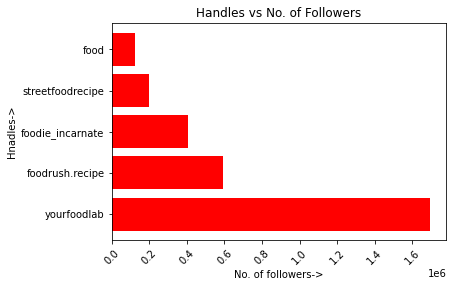

In [127]:
# Plotting a graph between top5 handles and thier number of followers
import matplotlib.pyplot as plt
plt.barh(top5,top5_followers,color='red')
plt.xticks(rotation=45)
plt.xlabel('No. of followers->')
plt.ylabel('Hnadles->')
plt.title('Handles vs No. of Followers')
plt.show()
plt.show()

### Question 1.2

In [23]:
import time
counts=[] # Initialising list for stroing number of posts from top5 handles in past 3 days
users=[]  # Handle's username
#Running a loop for each handle
for i in range(len(top5)):
    count=0
    complete_url=base_url+'/'+top5[i]+'/'
    driver.get(complete_url)  #Opening web driver session of each handle from top5 handles
    time.sleep(3) # Waiting for page to open
    post=driver.find_element_by_xpath('//div[contains(@class,"v1Nh3")]') # Locating the first post
    post.click() # Clicking on the first post 
    time.sleep(2) # Waiting to open it
    #Running a loop to count the posts within 3 days and incrementing the count and breaking it if the post in not within 3 days
    while True:
        utime=driver.find_element_by_xpath('//time[contains(@class,"_1o9PC")]') # Locating the upload time of the post
        # Checking different time of the posts
        # If the time is within hours then incrementing the count variable by 1 and going to the next post
        if utime.text.split(' ')[1]=='HOURS' or utime.text.split(' ')[1]=='HOUR':
            count+=1
            nextpost=driver.find_element_by_xpath('//a[contains(@class,"_65Bje")]') 
            nextpost.click()
            time.sleep(2) 
        # If the upload time is in days then checking if it is within 3 days or not
        # If yes then incrementing the count variable by 1 and going to the next post and if not then breaking out of the loop
        elif utime.text.split(' ')[1]=='DAYS' or utime.text.split(' ')[1]=='DAY':
            if int(utime.text.split(' ')[0])<=3:
                count+=1
                nextpost=driver.find_element_by_xpath('//a[contains(@class,"_65Bje")]') 
                nextpost.click()
                time.sleep(2)        
            else:
                break
        # If there is anything other than hours and days in the time then breakng from the loop        
        else:
            break
    counts.append(count) # After breaking from the loop storing the count in counts list
    users.append(top5[i]) # Appending the name of the handle
    close=driver.find_element_by_xpath('html/body/div[5]/div[3]/button/div') # Closing the post 
    close.click()        

In [63]:
# Printing the handle and their number of posts within 3 days
for i in range(len(users)):
    print(users[i],counts[i])

yourfoodlab 3
foodrush.recipe 0
foodie_incarnate 6
streetfoodrecipe 0
food 3


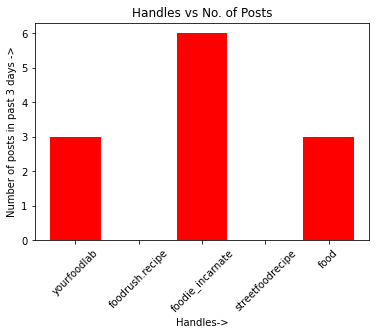

In [128]:
#Plotting a graph btwn top5 handles and their number of posts within 3 days
plt.bar(users,counts,color='red')
plt.xticks(rotation=45)
plt.xlabel('Handles->')
plt.ylabel('Number of posts in past 3 days ->')
plt.title('Handles vs No. of Posts')
plt.show()
plt.show()

## Question 2

### Question 2.1

In [29]:
contents=[] # Initialising an empty list to store the content of first 10 posts of the top5 handles
# Runnung a loop to open web driver session of each handle
for j in range(len(top5)):
    i=0
    complete_url=base_url+'/'+top5[j]+'/'
    driver.get(complete_url)
    time.sleep(3)
    post=driver.find_element_by_xpath('//div[contains(@class,"v1Nh3")]') # Clicking on the first post
    post.click()
    # Running a loop to scrape the content of first 10 posts of the handle
    while True:
            if i==10: # BReaking from loop when i becomes 10
                break
            time.sleep(3)    
            content=driver.find_element_by_xpath('//div[@class="C4VMK"]/span') # Locating the content
            time.sleep(2)
            contents.append(content.text) # Appending the content into the list
            time.sleep(2)
            nextpost=driver.find_element_by_xpath('//a[contains(@class,"_65Bje")]') # After appending the content going to the next post
            time.sleep(1) 
            nextpost.click()
            i+=1 # Incrementing i
close=driver.find_element_by_xpath('html/body/div[5]/div[3]/button/div')
close.click()             

In [140]:
contents # Content from each handle first 10 posts

['What’s up guys! My home-secret Mango Pickle recipe is out now on YouTube! Check it out now! This is the best ever Punjabi aam ka achaar you are gonna have!\nThis is my Chaiji’s recipe which I have learnt from my Maa. It’s the most delicious mango pickle I have always been having since I was a kid. It has this distinct saunf flavor & I call it the saunf aur aam ka achaar. I have never tasted anything like this ever. Do try it & let me know. Do share the video & recipe with as many people as possible so that everyone could enjoy having mere ghar ke aam ka achaar at their homes!\nI request you to please learn your home secret recipes from your Granny, grandfather, mom & dad & keep the legacy going. Share the recipes with as many people as possible so that everyone could enjoy those recipes. Also, don’t make it a gender specific role to keep these traditions alive & teach men & women these recipes if your the one who knows some secret recipes & if you are the one who is on the learning s

### Question 2.2

In [30]:
# Splitting the content by spaces to get the words used in the posts and storing them in words list
words=[] 
for i in range(len(contents)):
    words.append(contents[i].split(' '))

In [115]:
print(words) # Printing the list to get the words used in the posts

[['What’s', 'up', 'guys!', 'My', 'home-secret', 'Mango', 'Pickle', 'recipe', 'is', 'out', 'now', 'on', 'YouTube!', 'Check', 'it', 'out', 'now!', 'This', 'is', 'the', 'best', 'ever', 'Punjabi', 'aam', 'ka', 'achaar', 'you', 'are', 'gonna', 'have!\nThis', 'is', 'my', 'Chaiji’s', 'recipe', 'which', 'I', 'have', 'learnt', 'from', 'my', 'Maa.', 'It’s', 'the', 'most', 'delicious', 'mango', 'pickle', 'I', 'have', 'always', 'been', 'having', 'since', 'I', 'was', 'a', 'kid.', 'It', 'has', 'this', 'distinct', 'saunf', 'flavor', '&', 'I', 'call', 'it', 'the', 'saunf', 'aur', 'aam', 'ka', 'achaar.', 'I', 'have', 'never', 'tasted', 'anything', 'like', 'this', 'ever.', 'Do', 'try', 'it', '&', 'let', 'me', 'know.', 'Do', 'share', 'the', 'video', '&', 'recipe', 'with', 'as', 'many', 'people', 'as', 'possible', 'so', 'that', 'everyone', 'could', 'enjoy', 'having', 'mere', 'ghar', 'ke', 'aam', 'ka', 'achaar', 'at', 'their', 'homes!\nI', 'request', 'you', 'to', 'please', 'learn', 'your', 'home', 'secret'

In [32]:
import itertools # Importing required lib to convert 2-D list into 1-D list
d={} #Initialising an empty list to store the count of each word
# Converting 2-D list into 1-D list
list2d = [i for i in words]
list_words = list(itertools.chain(*list2d))
# Storing the count of each word in the dictionary
for i in list_words:
    if i in d:
        d[i]+=1
    else:
        d[i]=1

In [141]:
# Printing the frequency of each word used in the posts
word_frequency=[]
for i in d:
    word_frequency.append([i,d[i]])
print(word_frequency)    

[['What’s', 4], ['up', 8], ['guys!', 5], ['My', 3], ['home-secret', 1], ['Mango', 19], ['Pickle', 1], ['recipe', 16], ['is', 26], ['out', 13], ['now', 4], ['on', 19], ['YouTube!', 1], ['Check', 1], ['it', 45], ['now!', 1], ['This', 1], ['the', 60], ['best', 3], ['ever', 3], ['Punjabi', 1], ['aam', 3], ['ka', 3], ['achaar', 2], ['you', 24], ['are', 5], ['gonna', 1], ['have!\nThis', 1], ['my', 12], ['Chaiji’s', 1], ['which', 1], ['I', 22], ['have', 22], ['learnt', 1], ['from', 14], ['Maa.', 1], ['It’s', 3], ['most', 3], ['delicious', 11], ['mango', 5], ['pickle', 1], ['always', 1], ['been', 3], ['having', 2], ['since', 1], ['was', 1], ['a', 43], ['kid.', 1], ['It', 4], ['has', 3], ['this', 30], ['distinct', 1], ['saunf', 2], ['flavor', 1], ['&', 46], ['call', 1], ['aur', 1], ['achaar.', 1], ['never', 4], ['tasted', 1], ['anything', 2], ['like', 5], ['ever.', 1], ['Do', 4], ['try', 6], ['let', 3], ['me', 6], ['know.', 1], ['share', 2], ['video', 10], ['with', 30], ['as', 9], ['many', 5], 

### Question 2.3

In [142]:
import pandas as pd # Importing the required library

In [116]:
# Creating a dataframe of frequency of words
df = pd.DataFrame(word_frequency,columns=['Words','Frequency']) # Function to make dataframe with columns as Words and Frequency
print(df)

             Words  Frequency
0           What’s          4
1               up          8
2            guys!          5
3               My          3
4      home-secret          1
...            ...        ...
1268       #shrimp          1
1269    #arrabiata          1
1270        #sauce          1
1271        #spicy          1
1272  #newyorkcity          1

[1273 rows x 2 columns]


In [37]:
# Creating csv file with two columns : the word and its frequency
df.to_csv('Words.csv',index=False)

### Question 2.4

In [60]:
# Calculating most popular hastags used by these bloggers
df=df[df['Words'].str.startswith('#')] 
popular_hashtags=df.sort_values('Frequency',ascending=False)[0:10]
popular_hashtags.reset_index(drop=True,inplace=True)
print(popular_hashtags)

               Words  Frequency
0              #food         18
1            #foodie         17
2          #foodporn         12
3        #streetfood         12
4   #streetfoodindia         10
5           #nycfood         10
6   #foodphotography          9
7  #indianstreetfood          9
8       #yourfoodlab          8
9          #desifood          8


### Question 2.5 

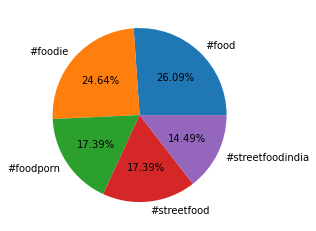

In [123]:
# Calculating the top 5 hashtags and their frequency and plotting a pie chart 
top5_hashtags=popular_hashtags.Words[0:5]
top5_hashtags_frequency=popular_hashtags.Frequency[0:5]
plt.pie(top5_hashtags_frequency,labels=top5_hashtags,autopct="%.2f%%")
plt.show()

## Question 3

### Question 3.1

In [62]:
from selenium.common.exceptions import NoSuchElementException #Importing the req library
l=[] #List to append the total likes of first 10 posts of each handle
# Running a loop to open the top5 handles
for j in range(len(top5)):
    i=0 # Making i=0
    total_likes=0 # Making total likes = 0
    complete_url=base_url+'/'+top5[j]+'/'
    driver.get(complete_url)
    time.sleep(3)
    post=driver.find_element_by_xpath('//div[contains(@class,"v1Nh3")]') # Locating the first post and opening it
    post.click()
    time.sleep(2)
    # Running a loop to get the total likes of first ten posts of the handle
    while True: 
        if i==10: #Breaking the loop as soon as i becomes 10
            break
        # We have to be careful if the upload is a reel or post as reels have views and we want likes which we find with posts    
        # So finding uploads having likes and not views so using no element exception
        # If the upload has views then the code will go into except block and then will go to the next post
        # If the upload has likes then the code will go to try and will add the likes to the total likes and then will go to the next post
        try:
            likes=driver.find_element_by_xpath('//a[@class="zV_Nj"]/span') # Loacting the likes
            likes=int(likes.text.replace(',','')) # Converting the string into integer and adding it in the total likes
            total_likes+=likes
            nextpost=driver.find_element_by_xpath('//a[contains(@class,"_65Bje")]') # Locating the next button and going to the next post
            time.sleep(3)
            nextpost.click()
        except:
            nextpost=driver.find_element_by_xpath('//a[contains(@class,"_65Bje")]') 
            nextpost.click()
            time.sleep(3)
            i=i-1    # Decrementing i as we have not find an upload with likes
        i+=1  
    l.append(total_likes)   
close=driver.find_element_by_xpath('html/body/div[5]/div[3]/button/div')
close.click()        

In [126]:
# Printing top5 handles with their likes on their top 10 posts
print('Top5 handles',' ','Likes')
for i in range(len(top5)):
    print(top5[i],l[i])

Top5 handles   Likes
yourfoodlab 315643
foodrush.recipe 228126
foodie_incarnate 317297
streetfoodrecipe 31837
food 8131


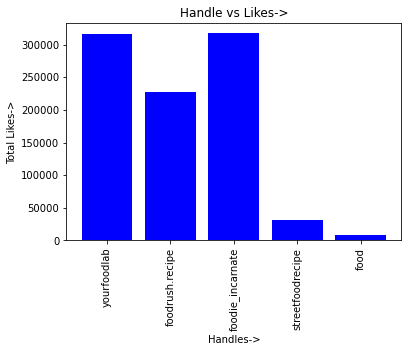

In [132]:
# Plotting a graph between handles and their number of likes on their first 10 posts
plt.bar(top5,l,color='blue')
plt.xticks(rotation=90)
plt.xlabel('Handles->')
plt.ylabel('Total Likes->')
plt.title('Handle vs Likes->')
plt.show()

### Question 3.2

In [67]:
# Calculating the avg likes by dividing the total likes by 10
avg_likes=[]
for i in l:
    avg_likes.append(i/10)   

In [131]:
# Printing top5 handles with their avg likes 
print('Top5 handles',' ','Avg Likes')
for i in range(len(top5)):
    print(top5[i],avg_likes[i])  

Top5 handles   Avg Likes
yourfoodlab 31564.3
foodrush.recipe 22812.6
foodie_incarnate 31729.7
streetfoodrecipe 3183.7
food 813.1


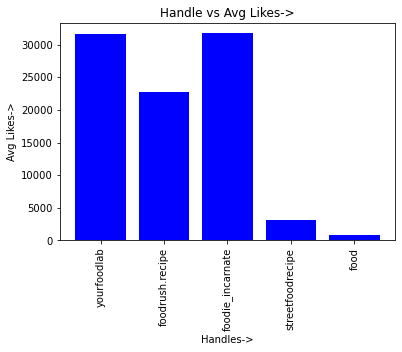

In [135]:
# Plotting a graph between handles and their avg likes
plt.bar(top5,avg_likes,color='blue')
plt.xticks(rotation=90)
plt.xlabel('Handles->')
plt.ylabel('Avg Likes->')
plt.title('Handle vs Avg Likes->')
plt.show()

### Question 3.3

In [100]:
#Calculating followers:likes ratio of the top5 handles
ratio=[]
for i in range(len(top5)):
    ratio.append(dict[top5[i]]/avg_likes[i])

In [134]:
# Printing the top5 handles and their followers:likes ratio
print('Top5 handles',' ','Followers:Likes')
for i in range(len(top5)):
    print(top5[i],ratio[i])

Top5 handles   Followers:Likes
yourfoodlab 53.71492477260703
foodrush.recipe 25.884686532880952
foodie_incarnate 12.730218060681317
streetfoodrecipe 61.70650500989415
food 152.3182880334522


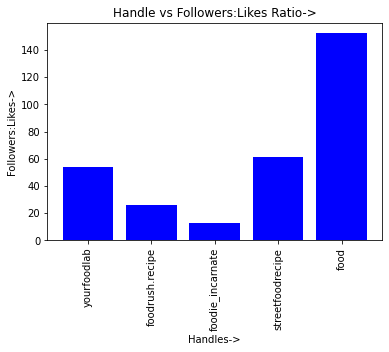

In [136]:
# Plotting a graph between handles and their followers:likes ratio
plt.bar(top5,ratio,color='blue')
plt.xticks(rotation=90)
plt.xlabel('Handles->')
plt.ylabel('Followers:Likes->')
plt.title('Handle vs Followers:Likes Ratio->')
plt.show()